In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
ruta = r"C:\\Users\\nicol\\OneDrive\\Escritorio\\LUMinCity\\LUMinCity"
df = pd.read_csv(os.path.join(ruta, "base_agentes_localizados.csv"), sep=";")

In [10]:
df.head()

,AGENTE_ID,ingreso_hogar,miembros_hogar,grupo_agente,INMUEBLE_ID,ZONA_ID,tipo_inmueble,formato_inmueble,superficie_construida,superficie_terreno,precio,macro_zona,num_estaciones_metro,sup_comercio,sup_industria,tiempo_viaje
0,0,1466934.87,3,alto,0,7,casa,0,158.7,294.7,378160.53,2,3,22284.9,13704.1,19.5
1,1,1137899.16,4,mediano,1,0,casa,0,186.4,307.4,242128.12,0,0,25642.9,14193.6,30.8
2,2,1558252.28,5,alto,2,5,dpto,1,68.2,76.9,368975.34,4,3,22711.8,17243.5,21.9
3,3,2211567.16,3,alto,3,4,dpto,1,73.7,82.5,266589.84,3,1,20524.3,15736.9,14.5
4,4,1095080.74,1,mediano,4,5,dpto,1,120.2,129.6,355613.38,4,3,22711.8,17243.5,24.3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGENTE_ID              100 non-null    int64  
 1   ingreso_hogar          100 non-null    float64
 2   miembros_hogar         100 non-null    int64  
 3   grupo_agente           100 non-null    object 
 4   INMUEBLE_ID            100 non-null    int64  
 5   ZONA_ID                100 non-null    int64  
 6   tipo_inmueble          100 non-null    object 
 7   formato_inmueble       100 non-null    int64  
 8   superficie_construida  100 non-null    float64
 9   superficie_terreno     100 non-null    float64
 10  precio                 100 non-null    float64
 11  macro_zona             100 non-null    int64  
 12  num_estaciones_metro   100 non-null    int64  
 13  sup_comercio           100 non-null    float64
 14  sup_industria          100 non-null    float64
 15  tiempo_

👥 Distribución de agentes por grupo de ingresos:


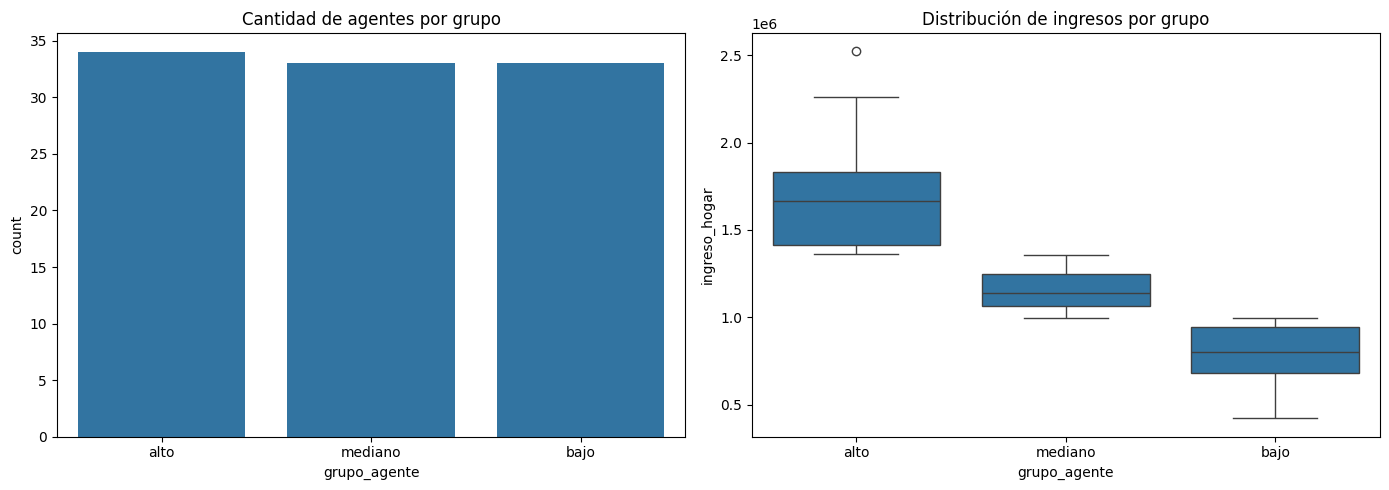


🏠 Miembros por hogar:


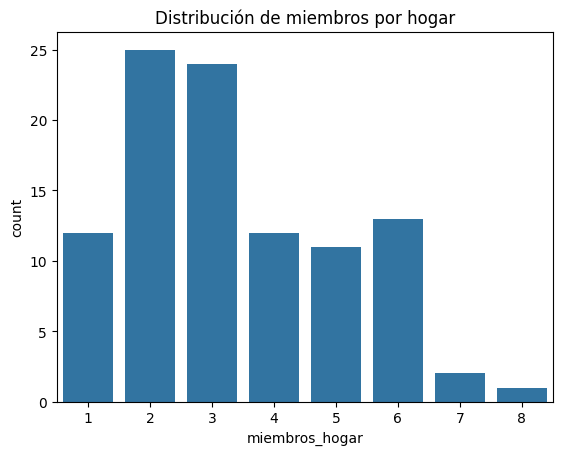

In [10]:
print("👥 Distribución de agentes por grupo de ingresos:")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=df, x='grupo_agente', ax=axes[0])
axes[0].set_title('Cantidad de agentes por grupo')

sns.boxplot(data=df, x='grupo_agente', y='ingreso_hogar', ax=axes[1])
axes[1].set_title('Distribución de ingresos por grupo')
plt.tight_layout()
plt.show()

print("\n🏠 Miembros por hogar:")
sns.countplot(data=df, x='miembros_hogar')
plt.title('Distribución de miembros por hogar')
plt.show()

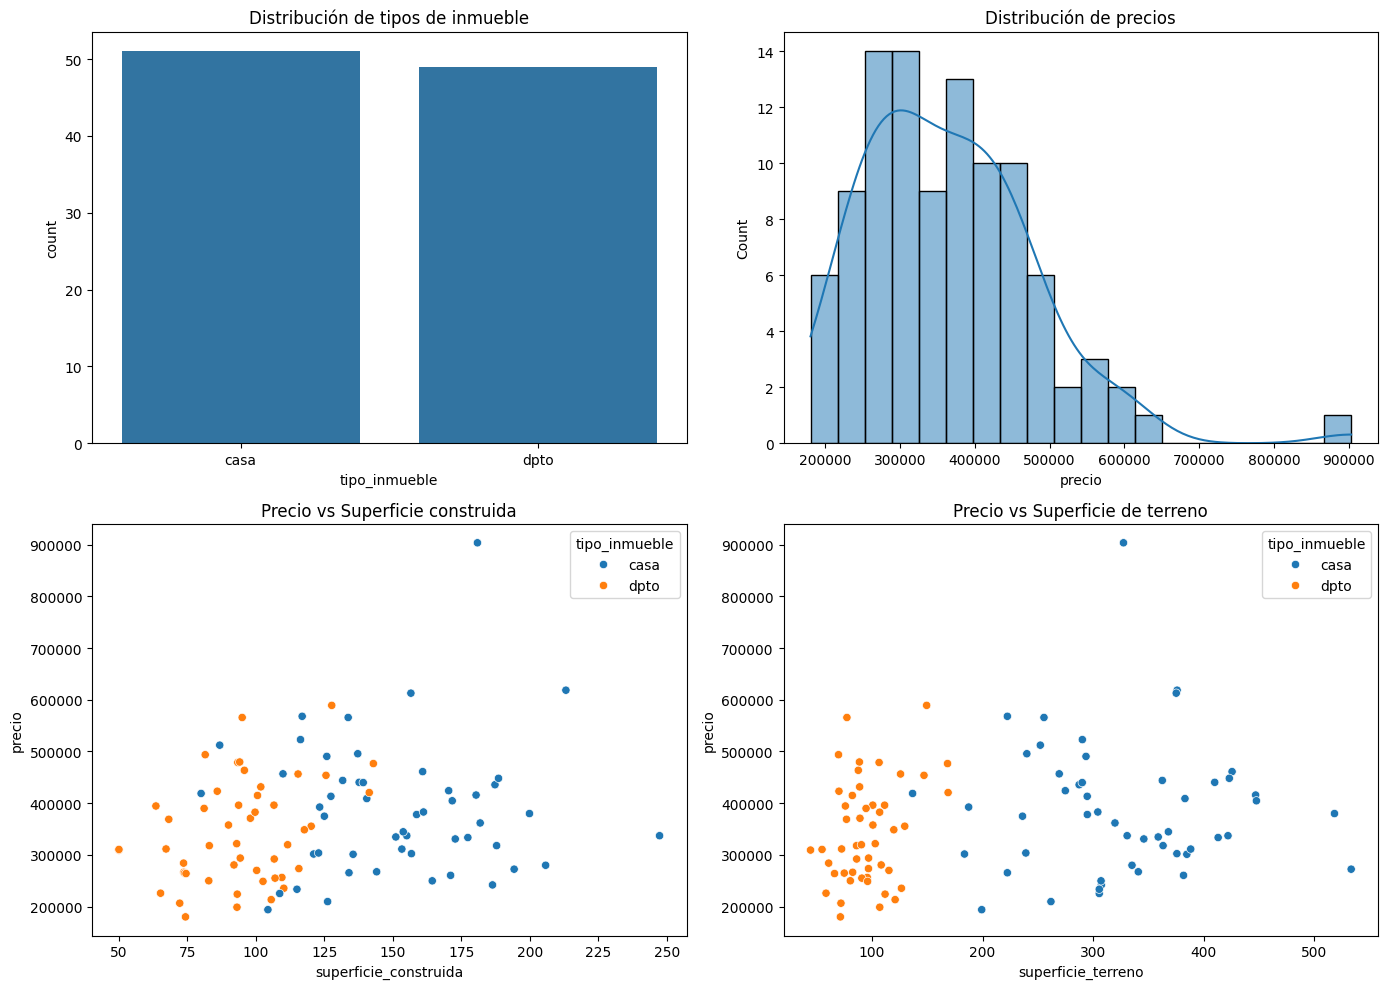

In [11]:
# Celda 4: Análisis de inmuebles
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Tipo de inmueble
sns.countplot(data=df, x='tipo_inmueble', ax=axes[0,0])
axes[0,0].set_title('Distribución de tipos de inmueble')

# Precios
sns.histplot(data=df, x='precio', bins=20, kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribución de precios')

# Superficies
sns.scatterplot(data=df, x='superficie_construida', y='precio', hue='tipo_inmueble', ax=axes[1,0])
axes[1,0].set_title('Precio vs Superficie construida')

sns.scatterplot(data=df, x='superficie_terreno', y='precio', hue='tipo_inmueble', ax=axes[1,1])
axes[1,1].set_title('Precio vs Superficie de terreno')

plt.tight_layout()
plt.show()

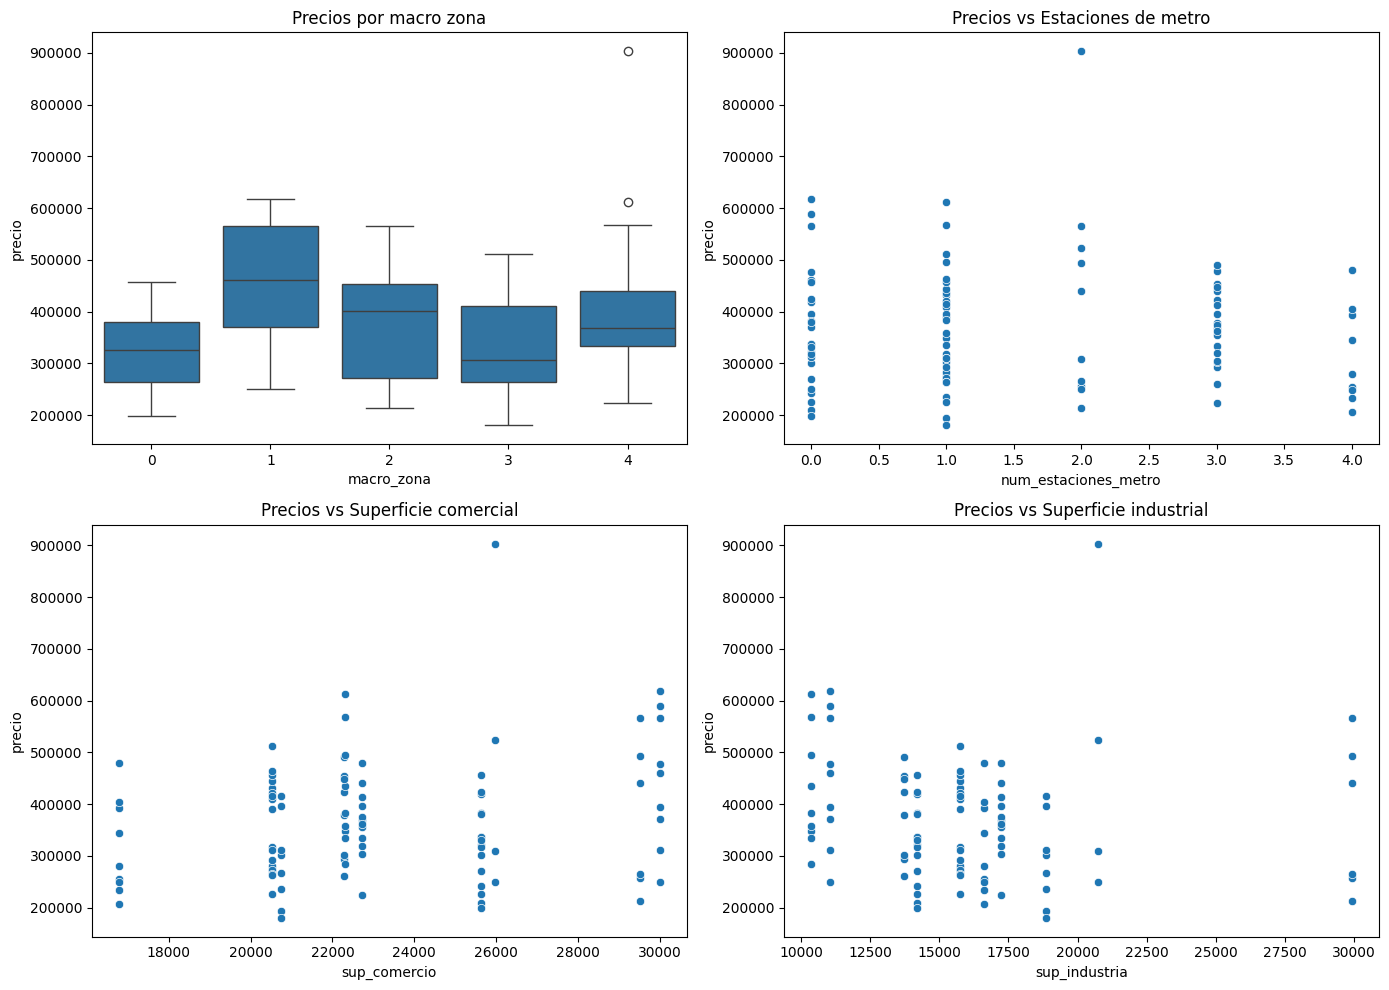

In [12]:
# Celda 5: Análisis por zonas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Características de zonas
sns.boxplot(data=df, x='macro_zona', y='precio', ax=axes[0,0])
axes[0,0].set_title('Precios por macro zona')

sns.scatterplot(data=df, x='num_estaciones_metro', y='precio', ax=axes[0,1])
axes[0,1].set_title('Precios vs Estaciones de metro')

sns.scatterplot(data=df, x='sup_comercio', y='precio', ax=axes[1,0])
axes[1,0].set_title('Precios vs Superficie comercial')

sns.scatterplot(data=df, x='sup_industria', y='precio', ax=axes[1,1])
axes[1,1].set_title('Precios vs Superficie industrial')

plt.tight_layout()
plt.show()

In [14]:
import numpy as np

🔗 Matriz de correlación:


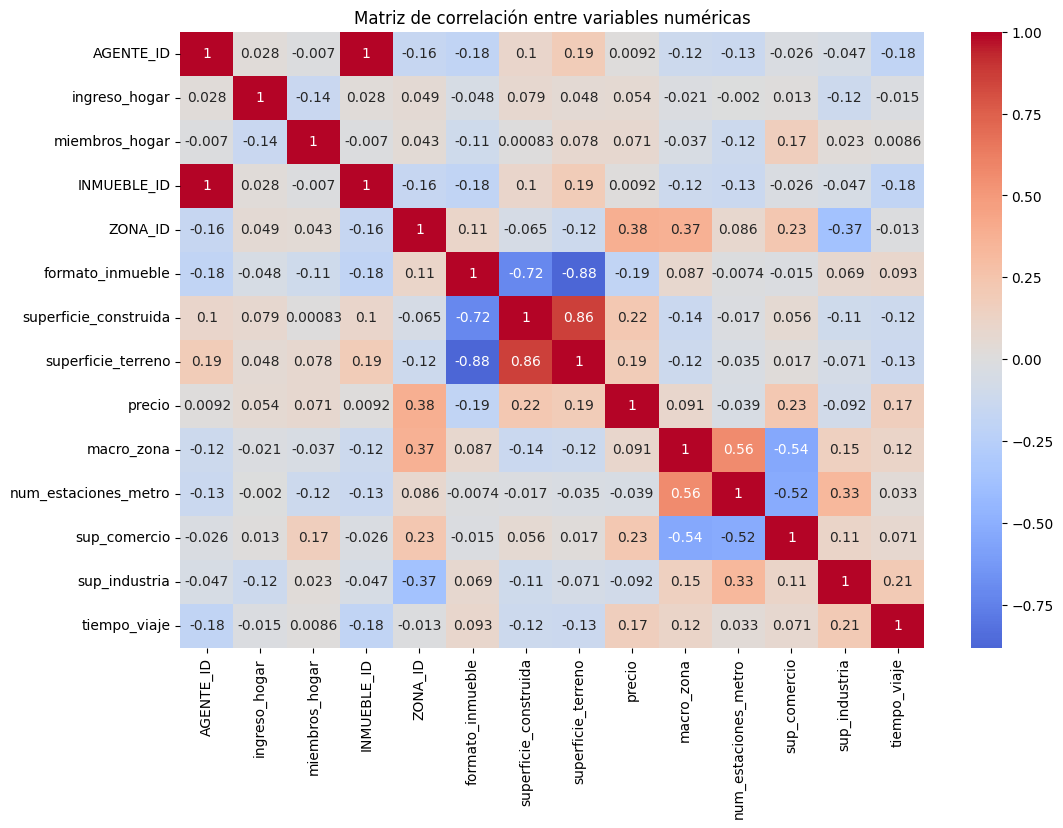


⏱️ Tiempo de viaje vs características:


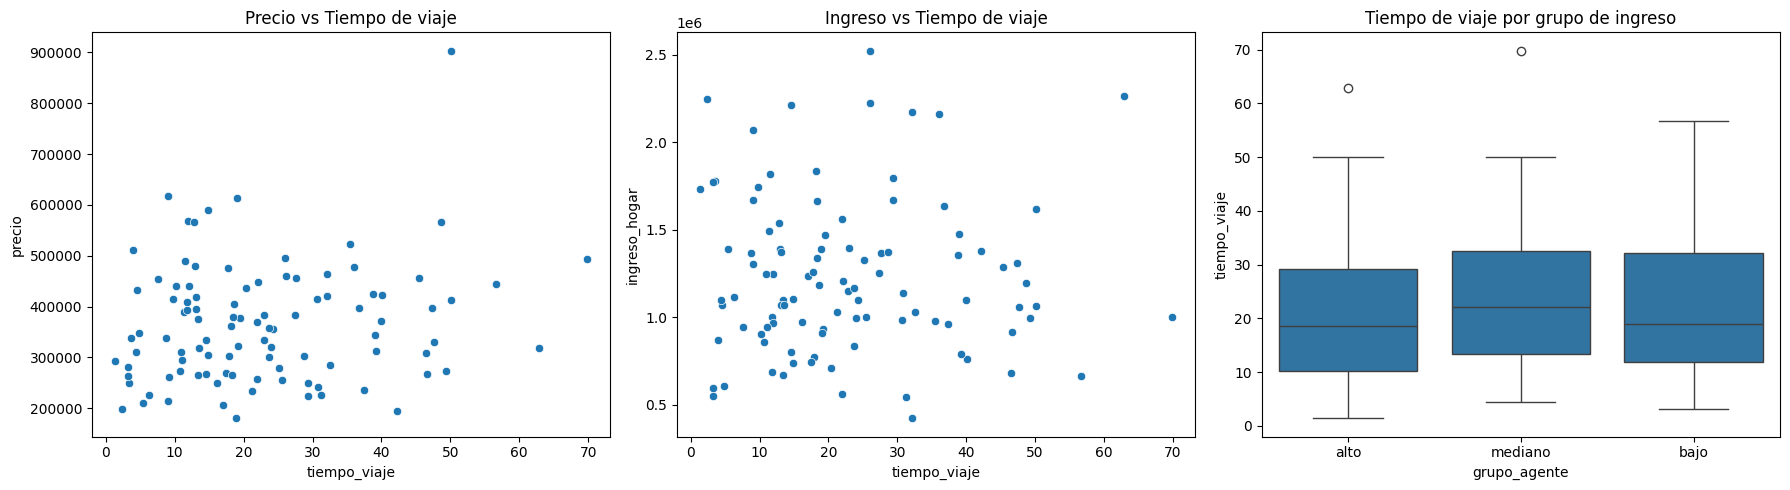

In [15]:
# Celda 6: Correlaciones y relaciones avanzadas
print("🔗 Matriz de correlación:")
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

print("\n⏱️ Tiempo de viaje vs características:")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df, x='tiempo_viaje', y='precio', ax=axes[0])
axes[0].set_title('Precio vs Tiempo de viaje')

sns.scatterplot(data=df, x='tiempo_viaje', y='ingreso_hogar', ax=axes[1])
axes[1].set_title('Ingreso vs Tiempo de viaje')

sns.boxplot(data=df, x='grupo_agente', y='tiempo_viaje', ax=axes[2])
axes[2].set_title('Tiempo de viaje por grupo de ingreso')

plt.tight_layout()
plt.show()

🧐 Análisis multivariado avanzado:


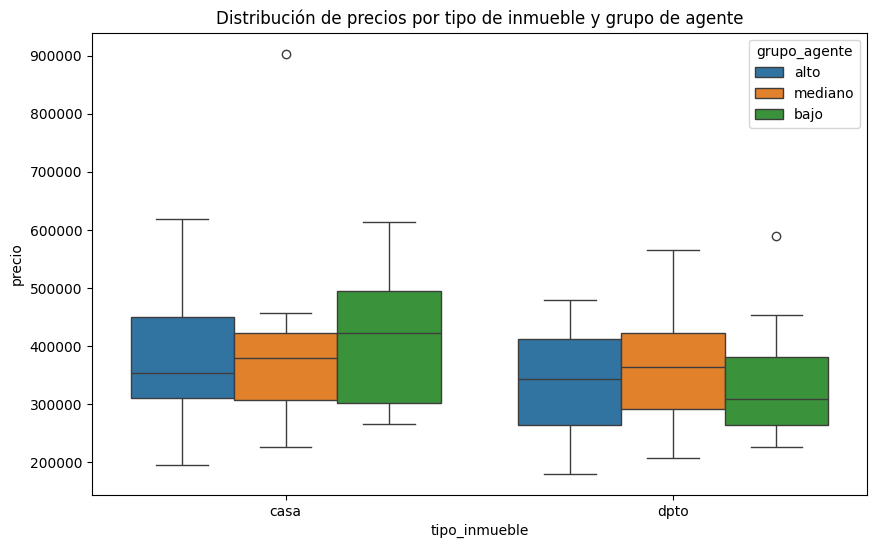

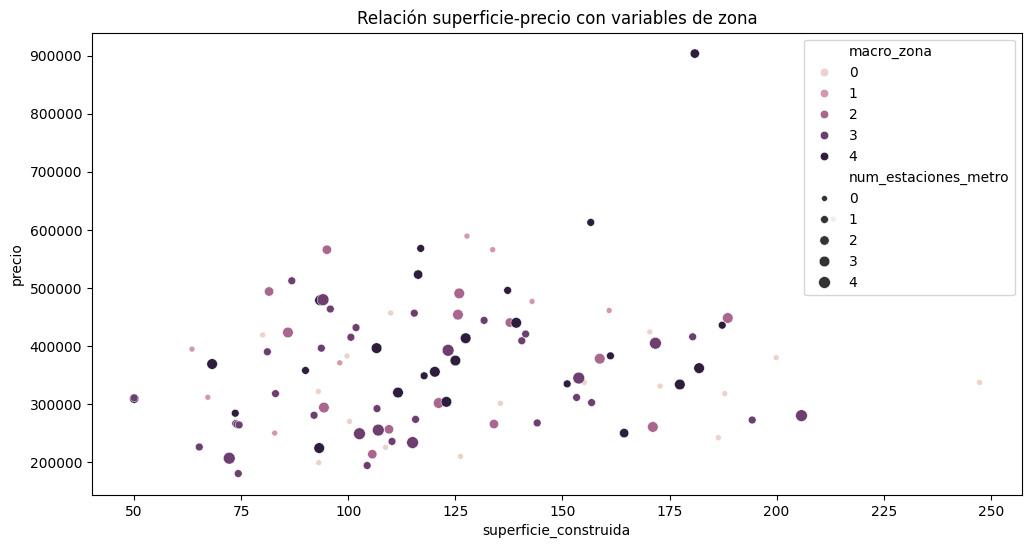

In [16]:
# Celda 7: Análisis multivariado
print("🧐 Análisis multivariado avanzado:")

# Relación entre tipo de inmueble, grupo de agente y precio
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='tipo_inmueble', y='precio', hue='grupo_agente')
plt.title('Distribución de precios por tipo de inmueble y grupo de agente')
plt.show()

# Relación entre superficie, precio y zona
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='superficie_construida', y='precio', 
                hue='macro_zona', size='num_estaciones_metro')
plt.title('Relación superficie-precio con variables de zona')
plt.show()

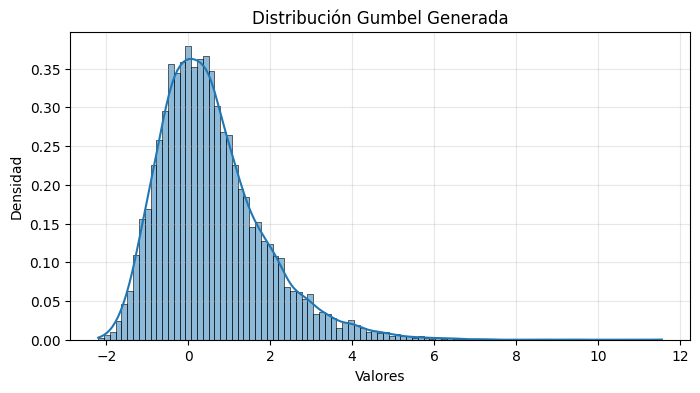

In [27]:
#Generar datos de la distribución Gumbel
def generar_gumbel(size, mu=0, beta=1):
    """Genera términos de error Gumbel para modelos logit"""
    U = np.random.uniform(0, 1, size=size)
    return mu - beta * np.log(-np.log(U))

# Parámetros para la visualización
mu = 0       # Parámetro de localización
beta = 1     # Parámetro de escala
size = 10000 # Tamaño de la muestra

# Generar muestras
gumbel_samples = generar_gumbel(size, mu, beta)

plt.figure(figsize=(8, 4))
sns.histplot(gumbel_samples, kde=True, stat='density')
plt.title('Distribución Gumbel Generada')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.show()